Consider only the below columns and prepare a prediction model for predicting Price.

Corolla $\rightarrow$ Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

- Model -- model of the car
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004	
- Mfg_Month -- Manufacturing month (1-12)	
- Mfg_Year	-- Manufacturing Year
- KM -- Accumulated Kilometers on odometer
- Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
- HP -- Horse Power
- Met_Color	 -- Metallic Color?  (Yes=1, No=0)
- Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
- Automatic	-- Automatic ( (Yes=1, No=0)
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Cylinders	-- Number of cylinders
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms
- Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
- BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
- Guarantee_Period -- 	Guarantee period in months
- ABS -- Anti-Lock Brake System (Yes=1, No=0)
- Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
- Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
- Airco -- Airconditioning  (Yes=1, No=0)
- Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
- Boardcomputer -- Boardcomputer  (Yes=1, No=0)
- CD_Player -- CD Player  (Yes=1, No=0)
- Central_Lock -- Central Lock  (Yes=1, No=0)
- Powered_Windows -- Powered Windows  (Yes=1, No=0)
- Power_Steering -- Power Steering  (Yes=1, No=0)
- Radio -- Radio  (Yes=1, No=0)
- Mistlamps	-- Mistlamps  (Yes=1, No=0)
- Sport_Model -- Sport Model  (Yes=1, No=0)
- Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
- Metallic_Rim --Metallic Rim  (Yes=1, No=0)
- Radio_cassette -- Radio Cassette  (Yes=1, No=0)
- Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#to remove unicodedecode error include encoding_errors='ignore'. what is unicodedecode error, the error in decoding string datatype
#error solution source stackoverflow.com
data=pd.read_csv("ToyotaCorolla.csv",encoding_errors='ignore')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data2=data.drop(data.columns[[0,1,4,5,7,9,10,11,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]],axis=1)
data2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
corr = data2.corr()
corr

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot: >

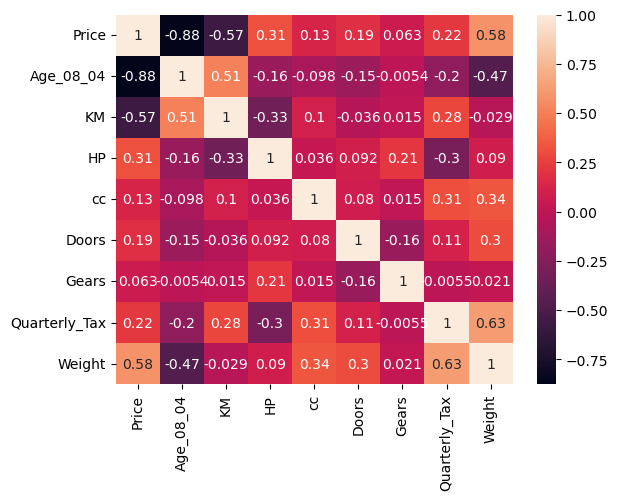

In [7]:
sns.heatmap(corr, annot=True)

In [8]:
data3=data2.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax','cc':'CC'},axis=1)
data3.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'Tax', 'Weight'], dtype='object')

In [9]:
#Chexk for duplicates because the data is large
data3[data3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
#drop 113 row
data4=data3.drop(data3.index[113],axis=0).reset_index(drop=True)
data4.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
#cross-check for any duplicates in new data
data4[data4.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight


In [12]:
#Check for any null values
data4.isna().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [13]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   Tax     1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


In [14]:
data4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [15]:
data4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot: >

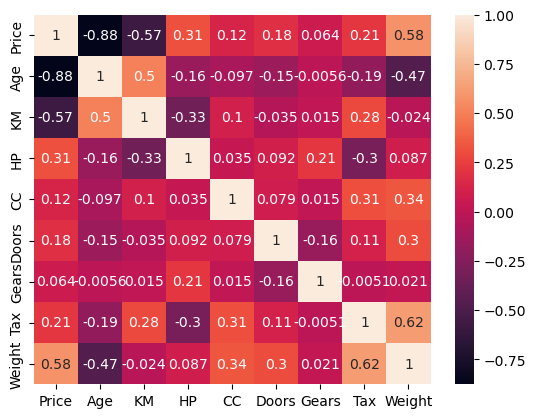

In [16]:
sns.heatmap(data4.corr(), annot=True)

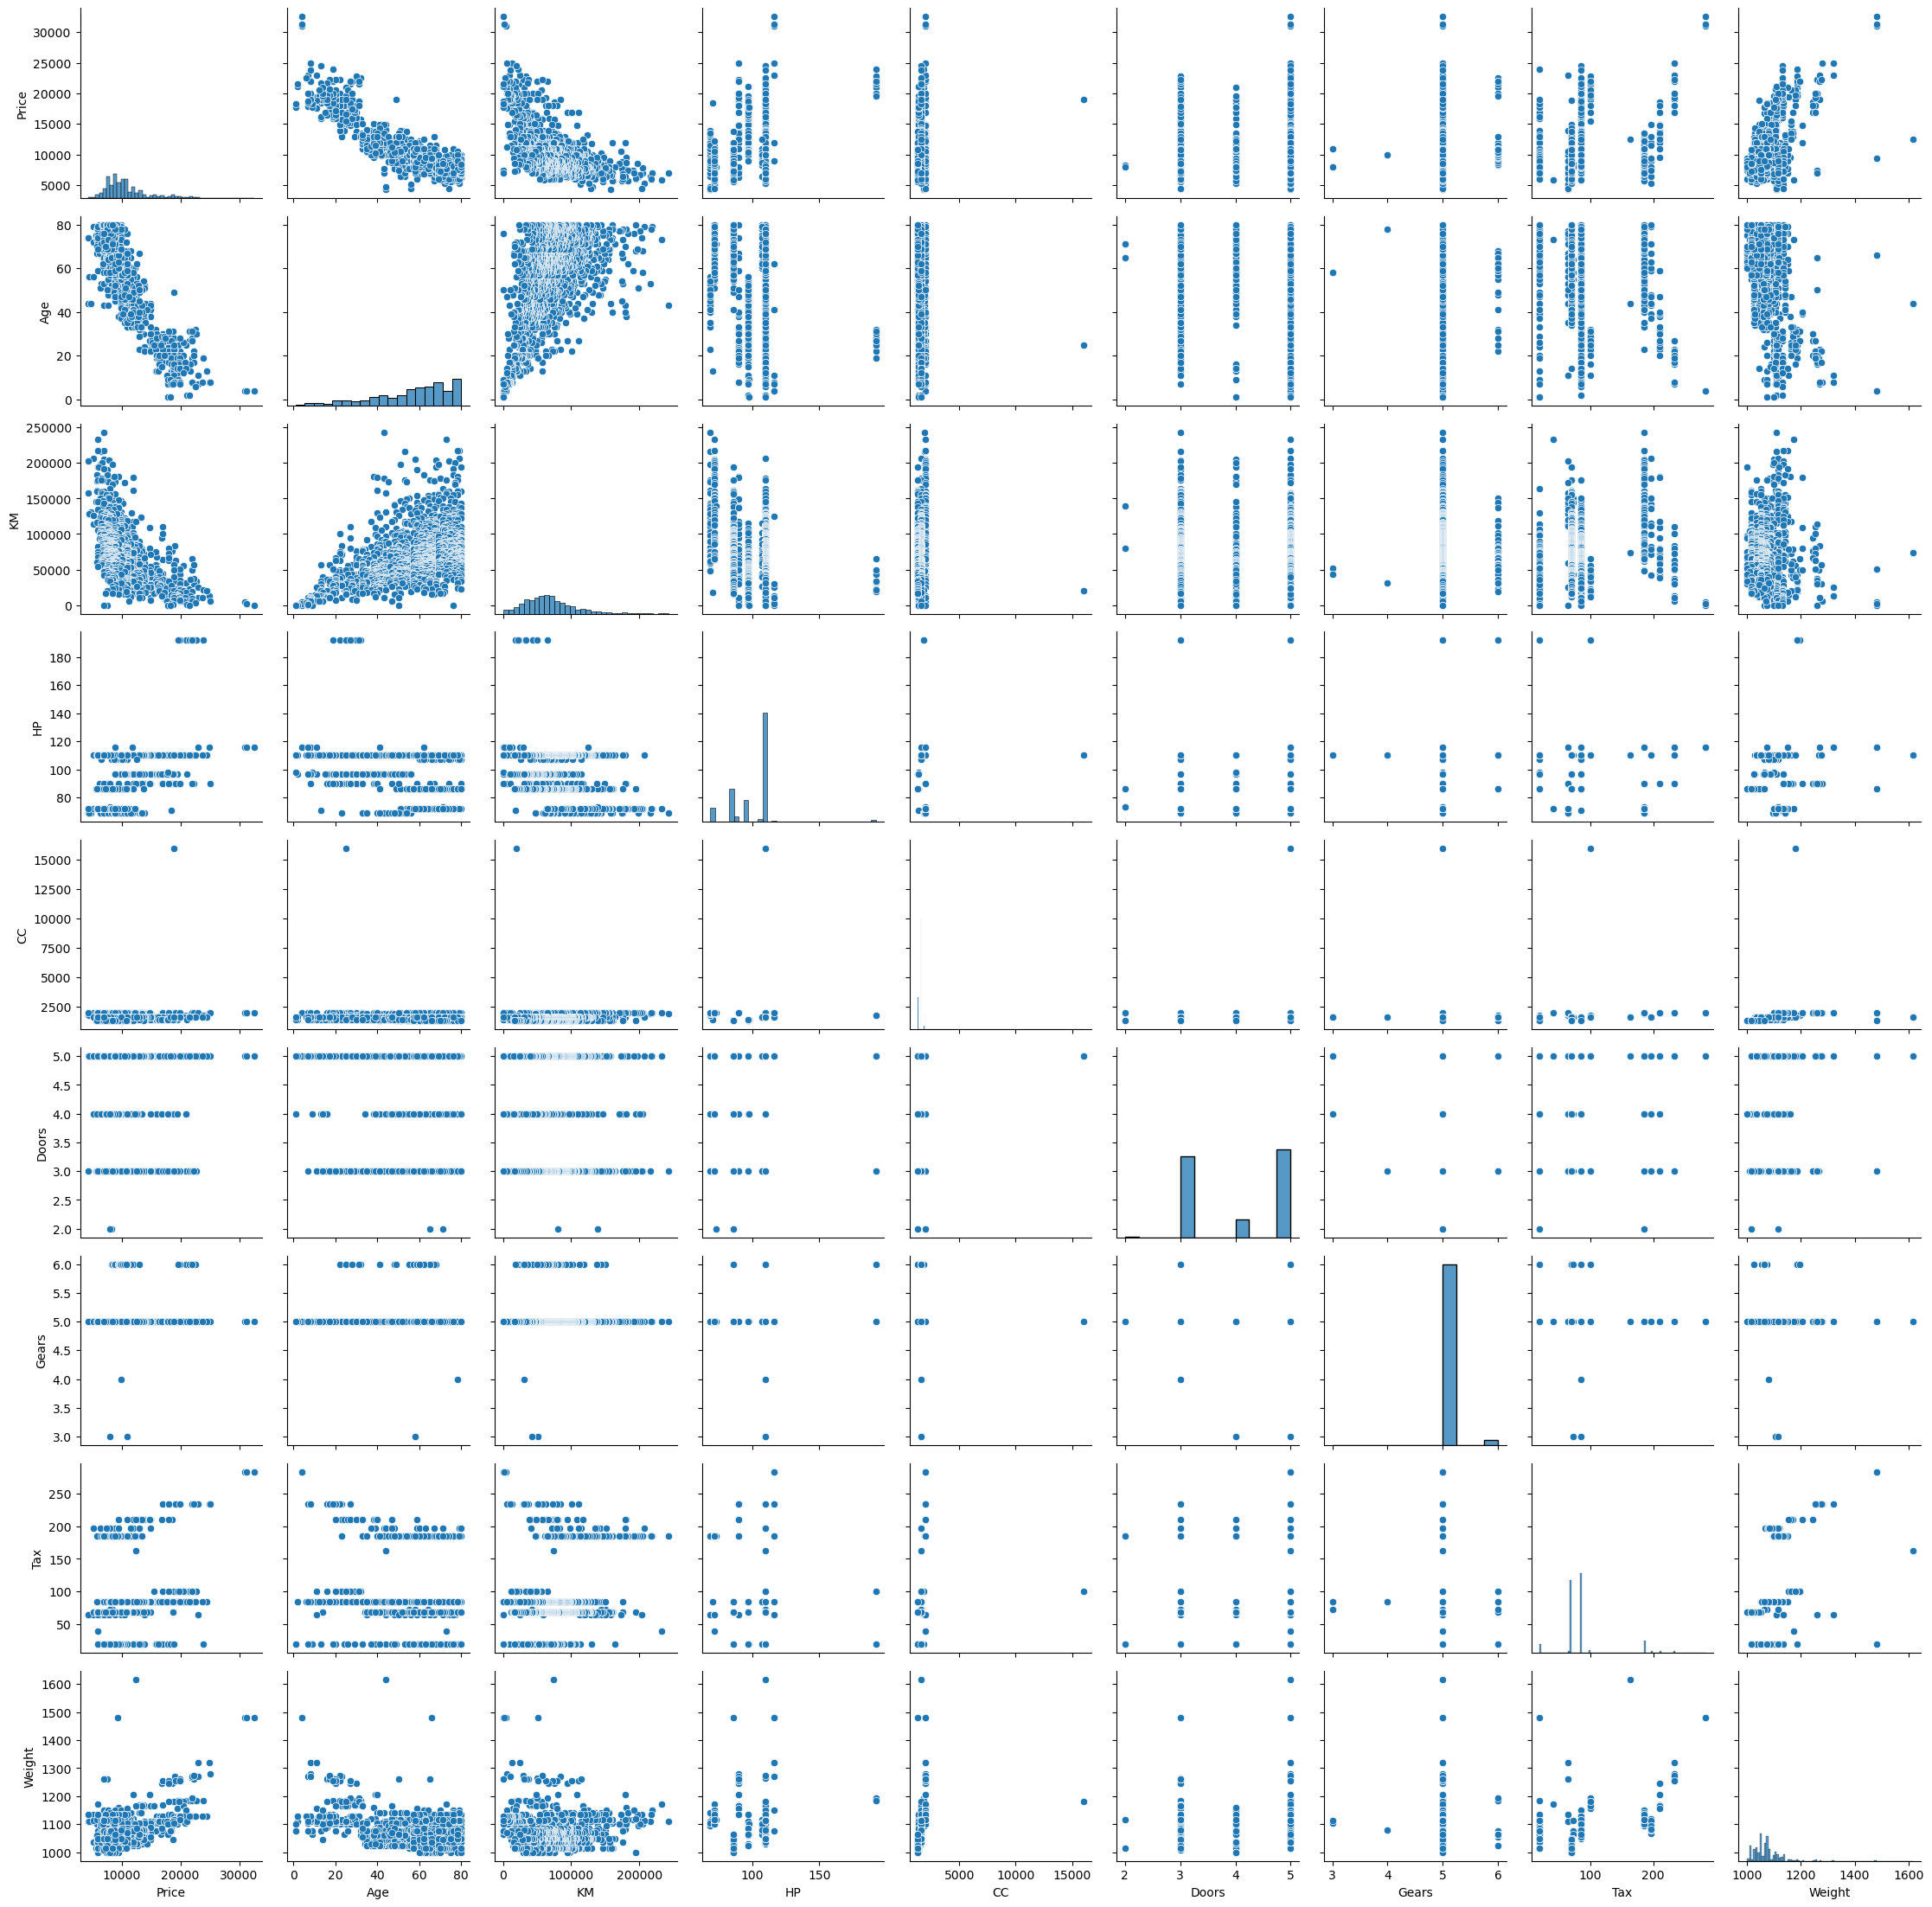

In [17]:
g = sns.PairGrid(data4)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [18]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:08:37   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [20]:
model.tvalues,'\n',model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 Tax           2.944198
 Weight       15.760663
 dtype: float64,
 '\n',
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 Tax           3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [21]:
model.rsquared,model.rsquared_adj #model accuracy is already 86.25% while adjusted accuracy is 86.17%

(0.8625200256947001, 0.8617487495415147)

In [22]:
c=smf.ols("Price~CC", data=data4).fit()
c.tvalues,'\n',c.pvalues #p-value<0.05

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 '\n',
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [23]:
d=smf.ols("Price~Doors", data=data4).fit()
d.tvalues,'\n',d.pvalues #p-value<0.05

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 '\n',
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [24]:
co=smf.ols("Price~CC+Doors", data=data4).fit()
co.tvalues,'\n',co.pvalues #both the columns play a significant role in building the accuracy of model

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 '\n',
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [25]:
#measure of checking collinearity
#Vif = variable inflation factor = 1/(1-r**2)

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+Tax+Weight',data=data4).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+Tax+Weight',data=data4).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+Tax+Weight',data=data4).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_Tax=smf.ols('Tax~Age+KM+HP+CC+Doors+Gears+Weight',data=data4).fit().rsquared
vif_Tax=1/(1-rsq_Tax)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+Tax',data=data4).fit().rsquared
vif_WT=1/(1-rsq_WT)

#create a dataframe with respective VIF values
vif={'Variable':['Age','KM','HP','CC','DR','GR','Tax','WT'],'VIF':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_Tax,vif_WT]}
q=pd.DataFrame(vif)
q #since Vif<3 all the variables are non-collinear

,Variable,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,DR,1.155890
5,GR,1.098843
6,Tax,2.295375
7,WT,2.487180


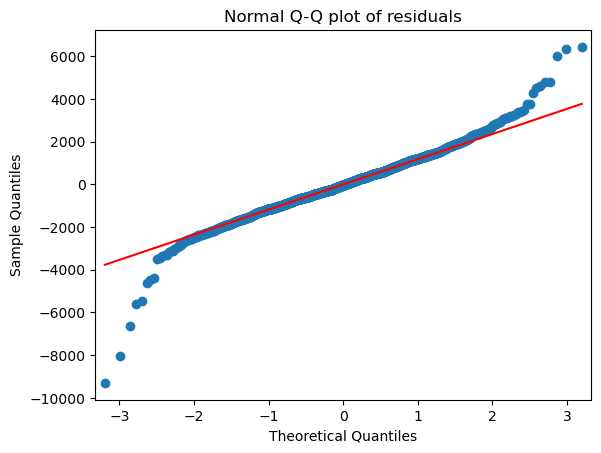

In [26]:
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [27]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [28]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() #z=(x-mu)/sigma

In [30]:
model.fittedvalues

0       16791.958871
1       16253.800414
2       16779.635210
3       16405.789389
4       16200.217277
            ...     
1430     8794.255037
1431     8292.577342
1432     8455.434402
1433     8579.222041
1434    10396.087526
Length: 1435, dtype: float64

In [31]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

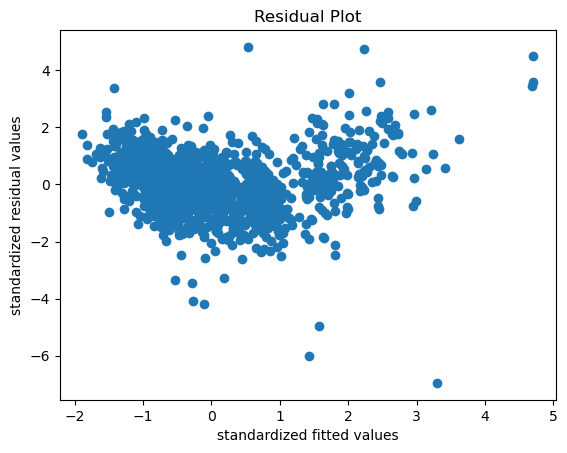

<Figure size 2000x1000 with 0 Axes>

In [32]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
fig = plt.figure(figsize=(20,10))
plt.show()

eval_env: 1


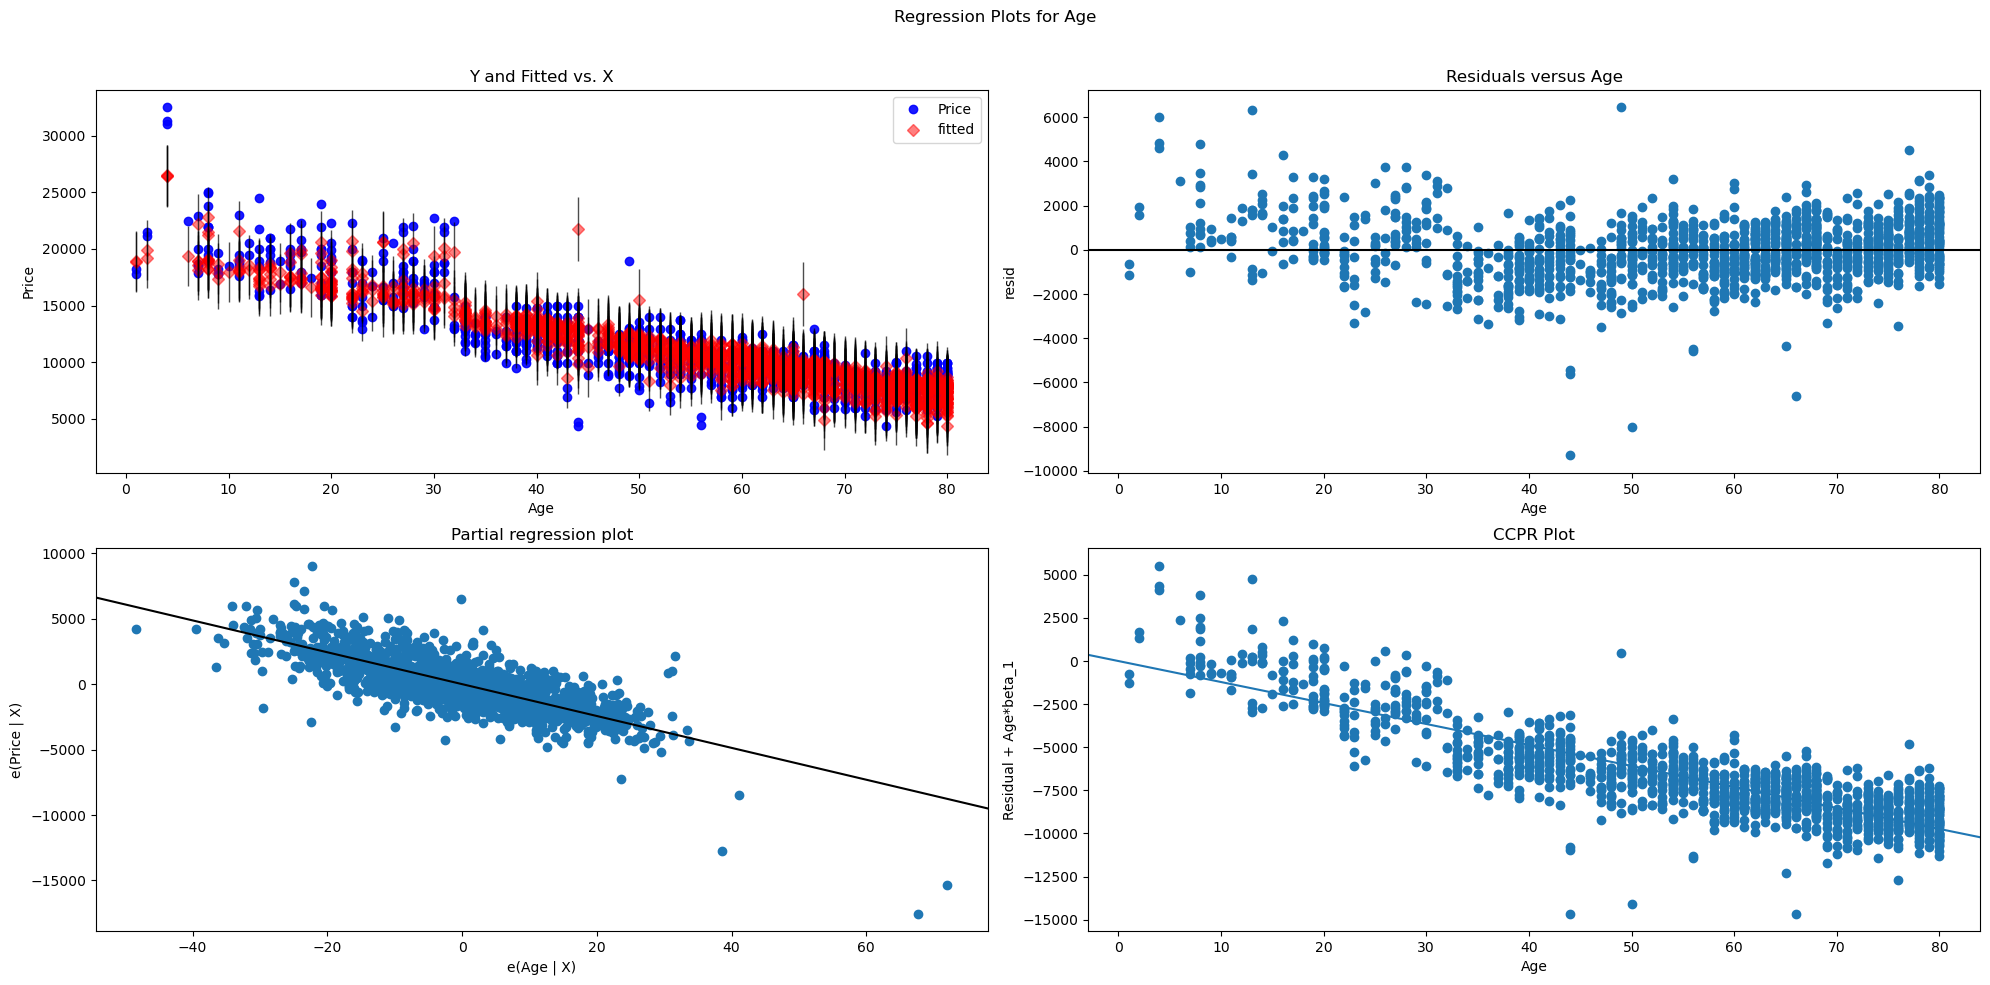

In [33]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

eval_env: 1


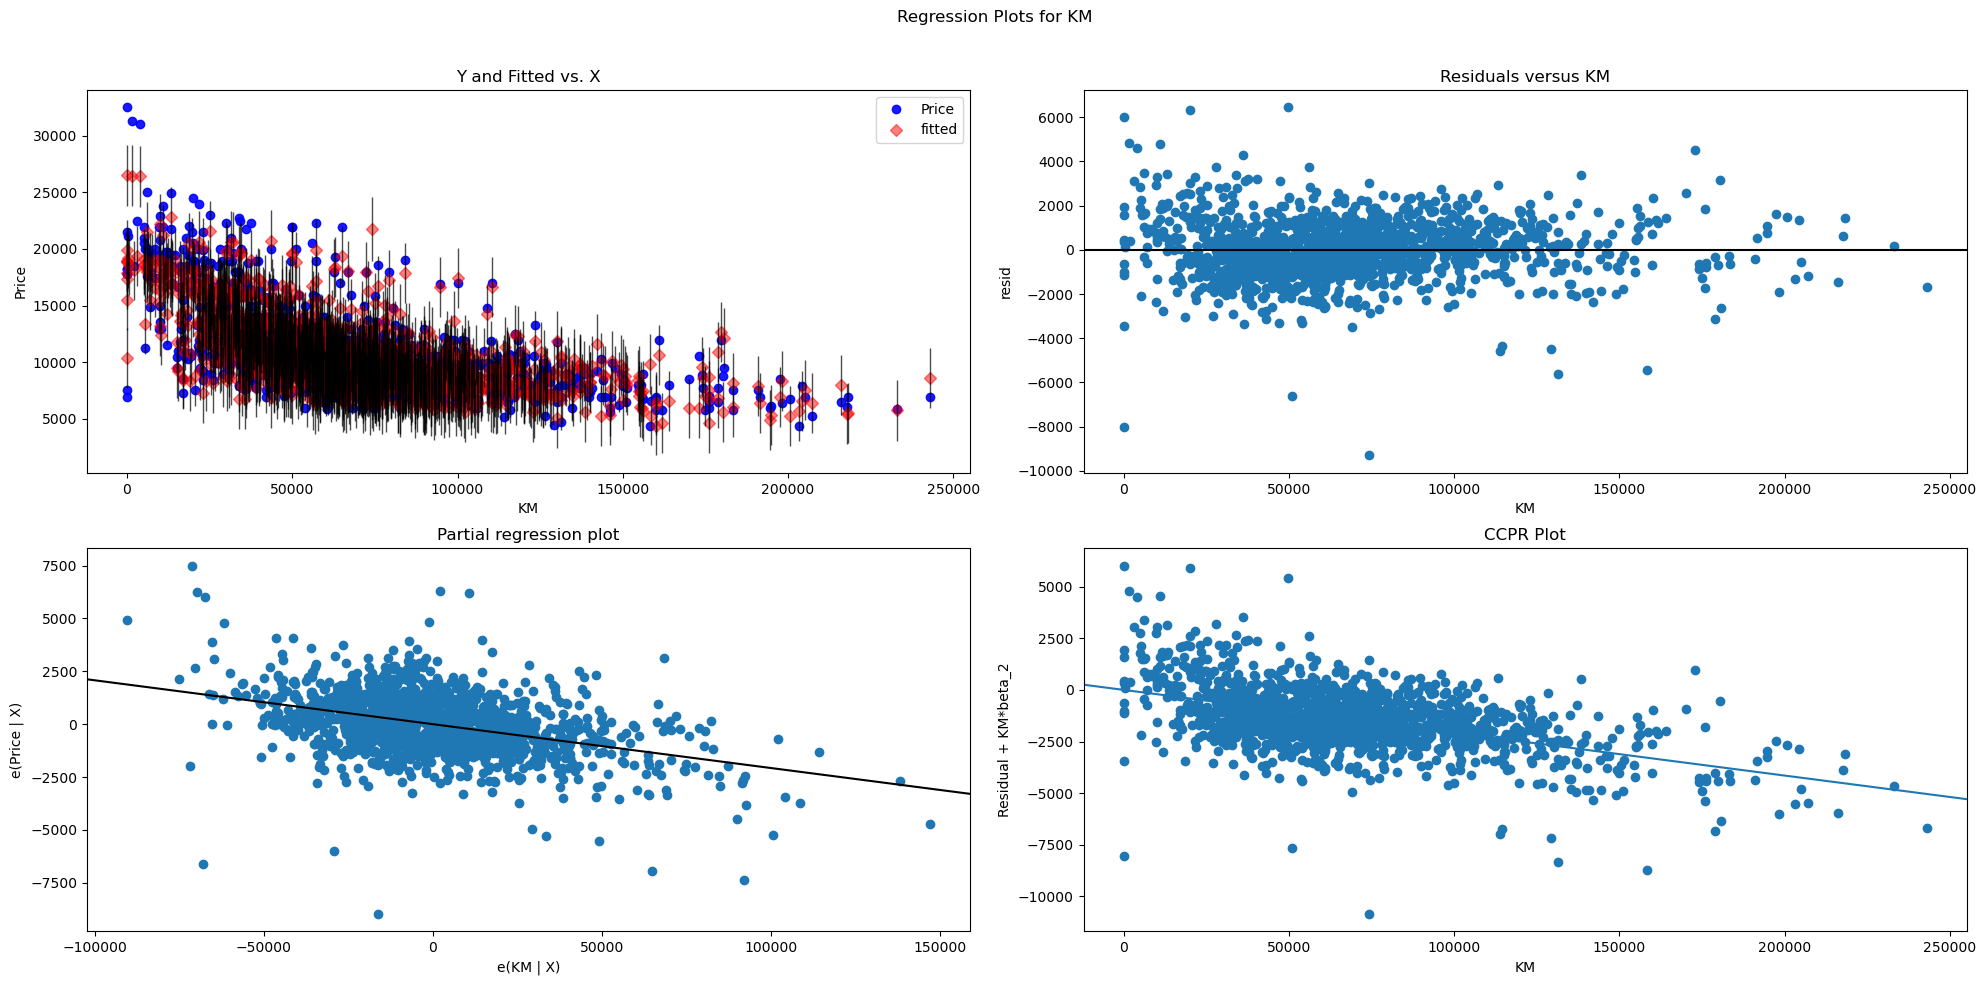

In [34]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

eval_env: 1


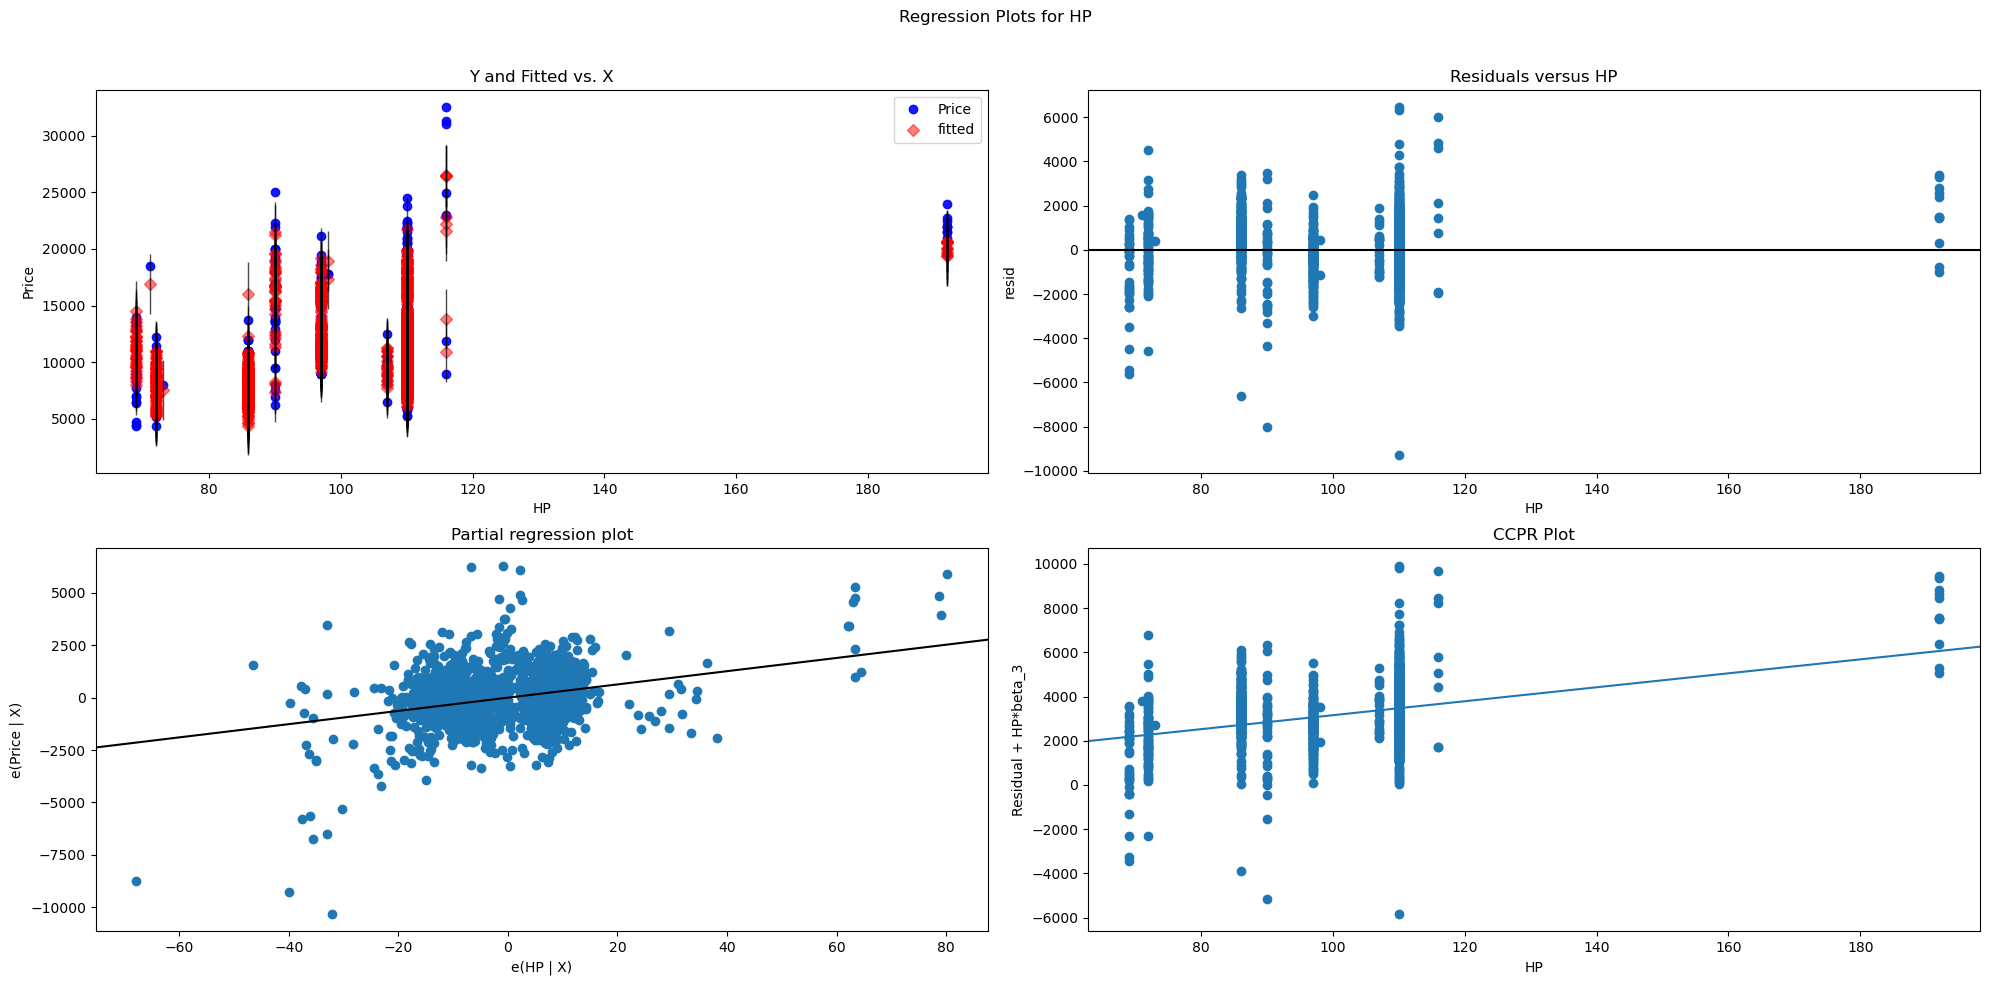

In [35]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

eval_env: 1


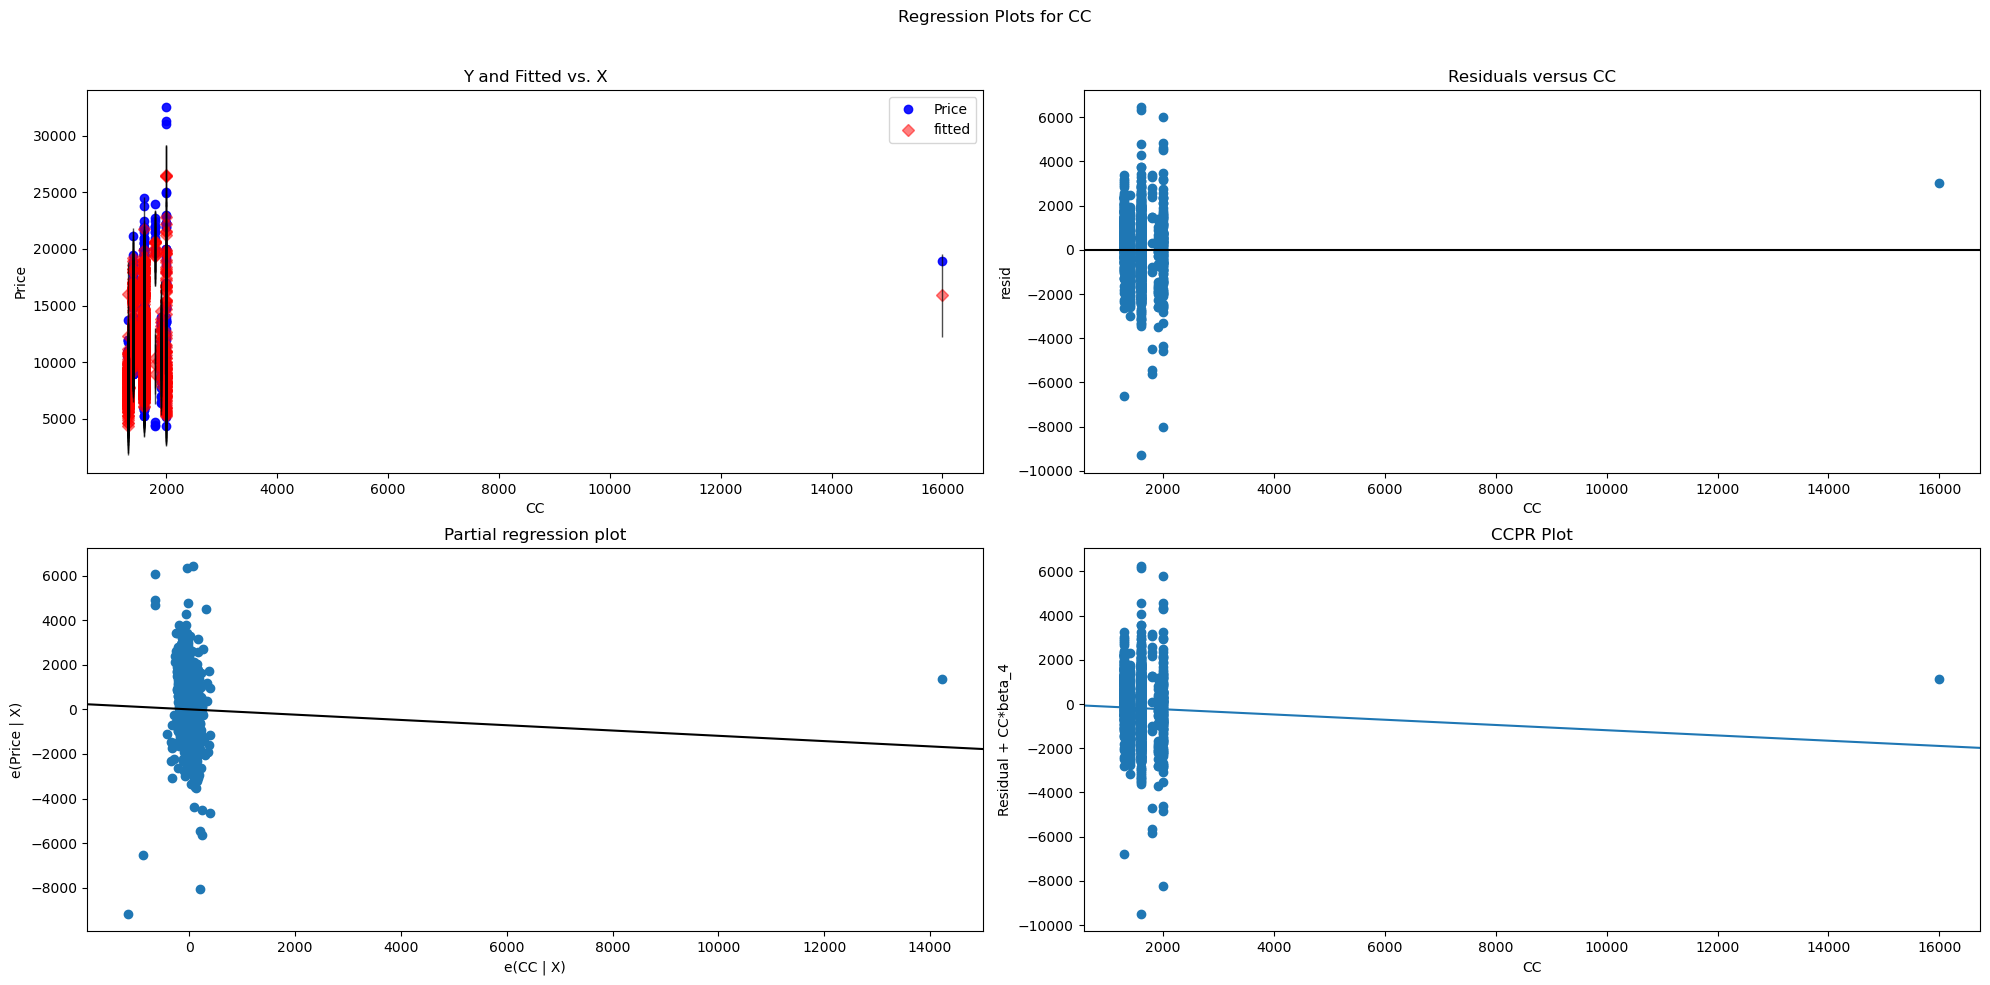

In [36]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

eval_env: 1


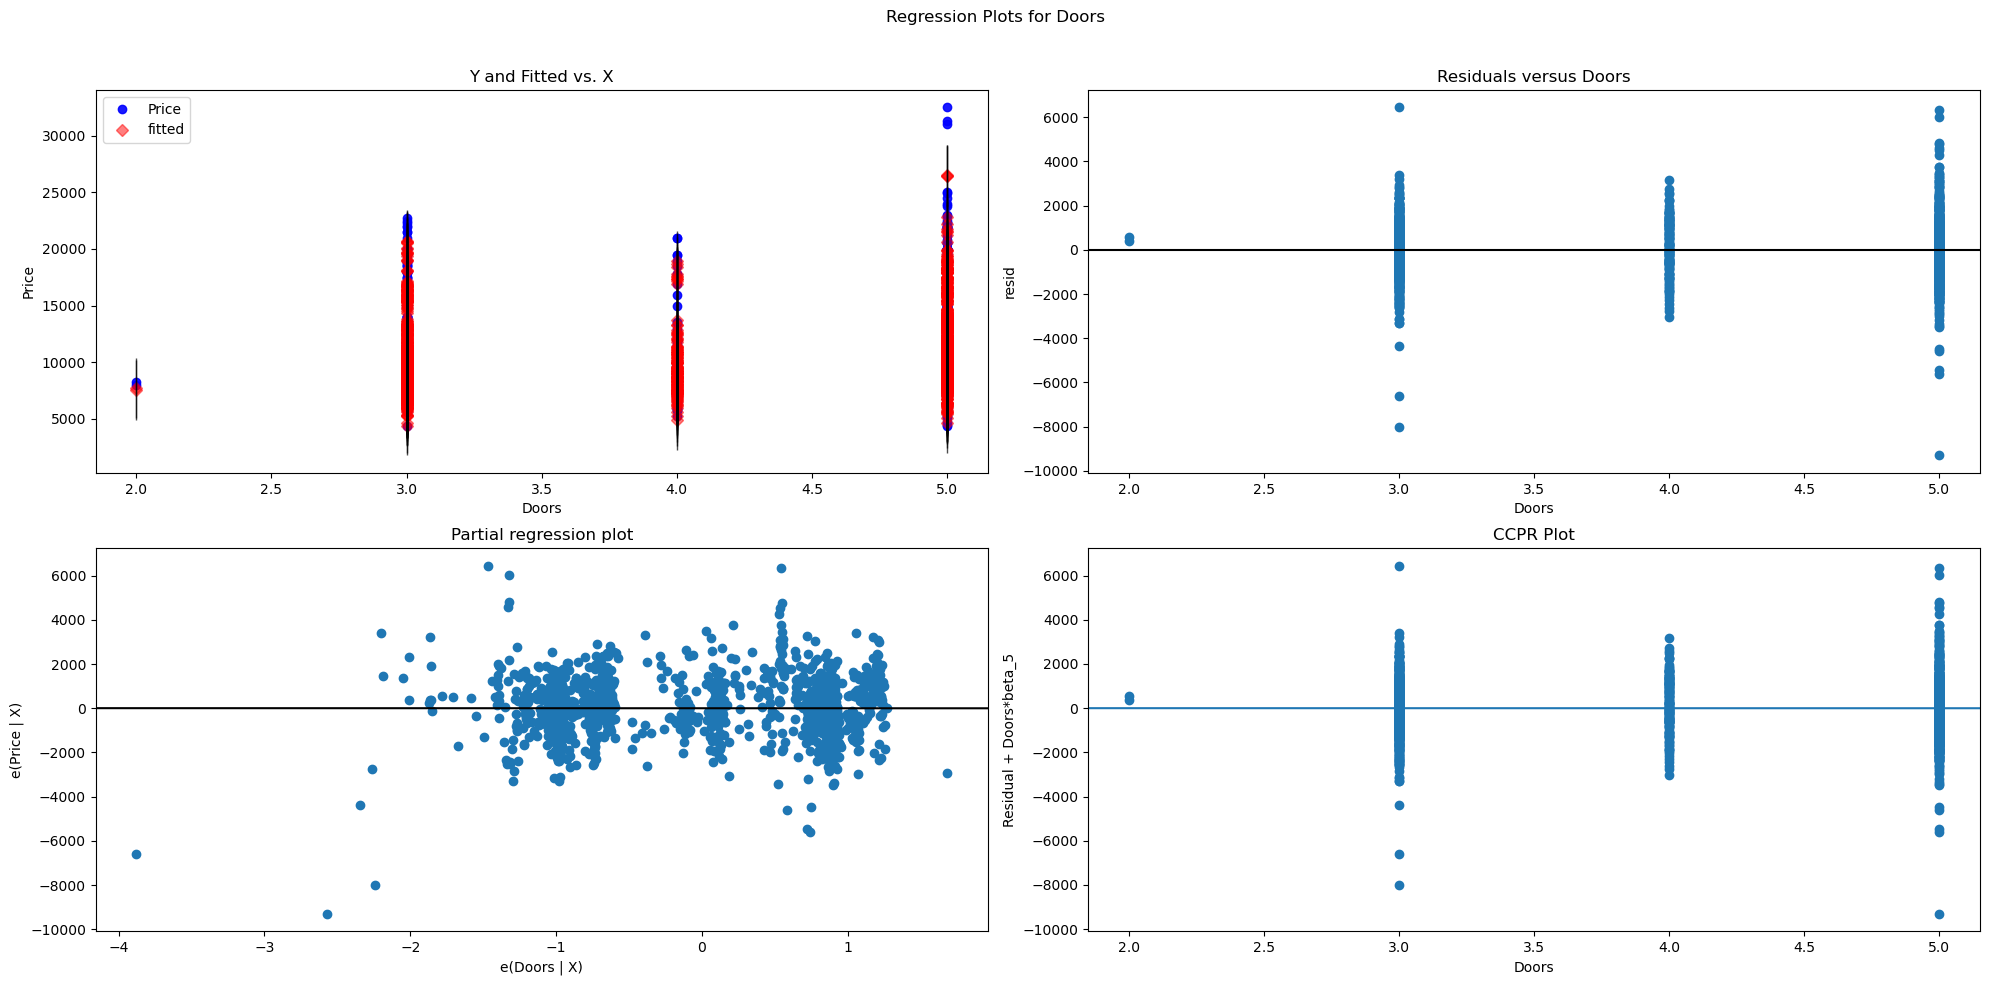

In [37]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

eval_env: 1


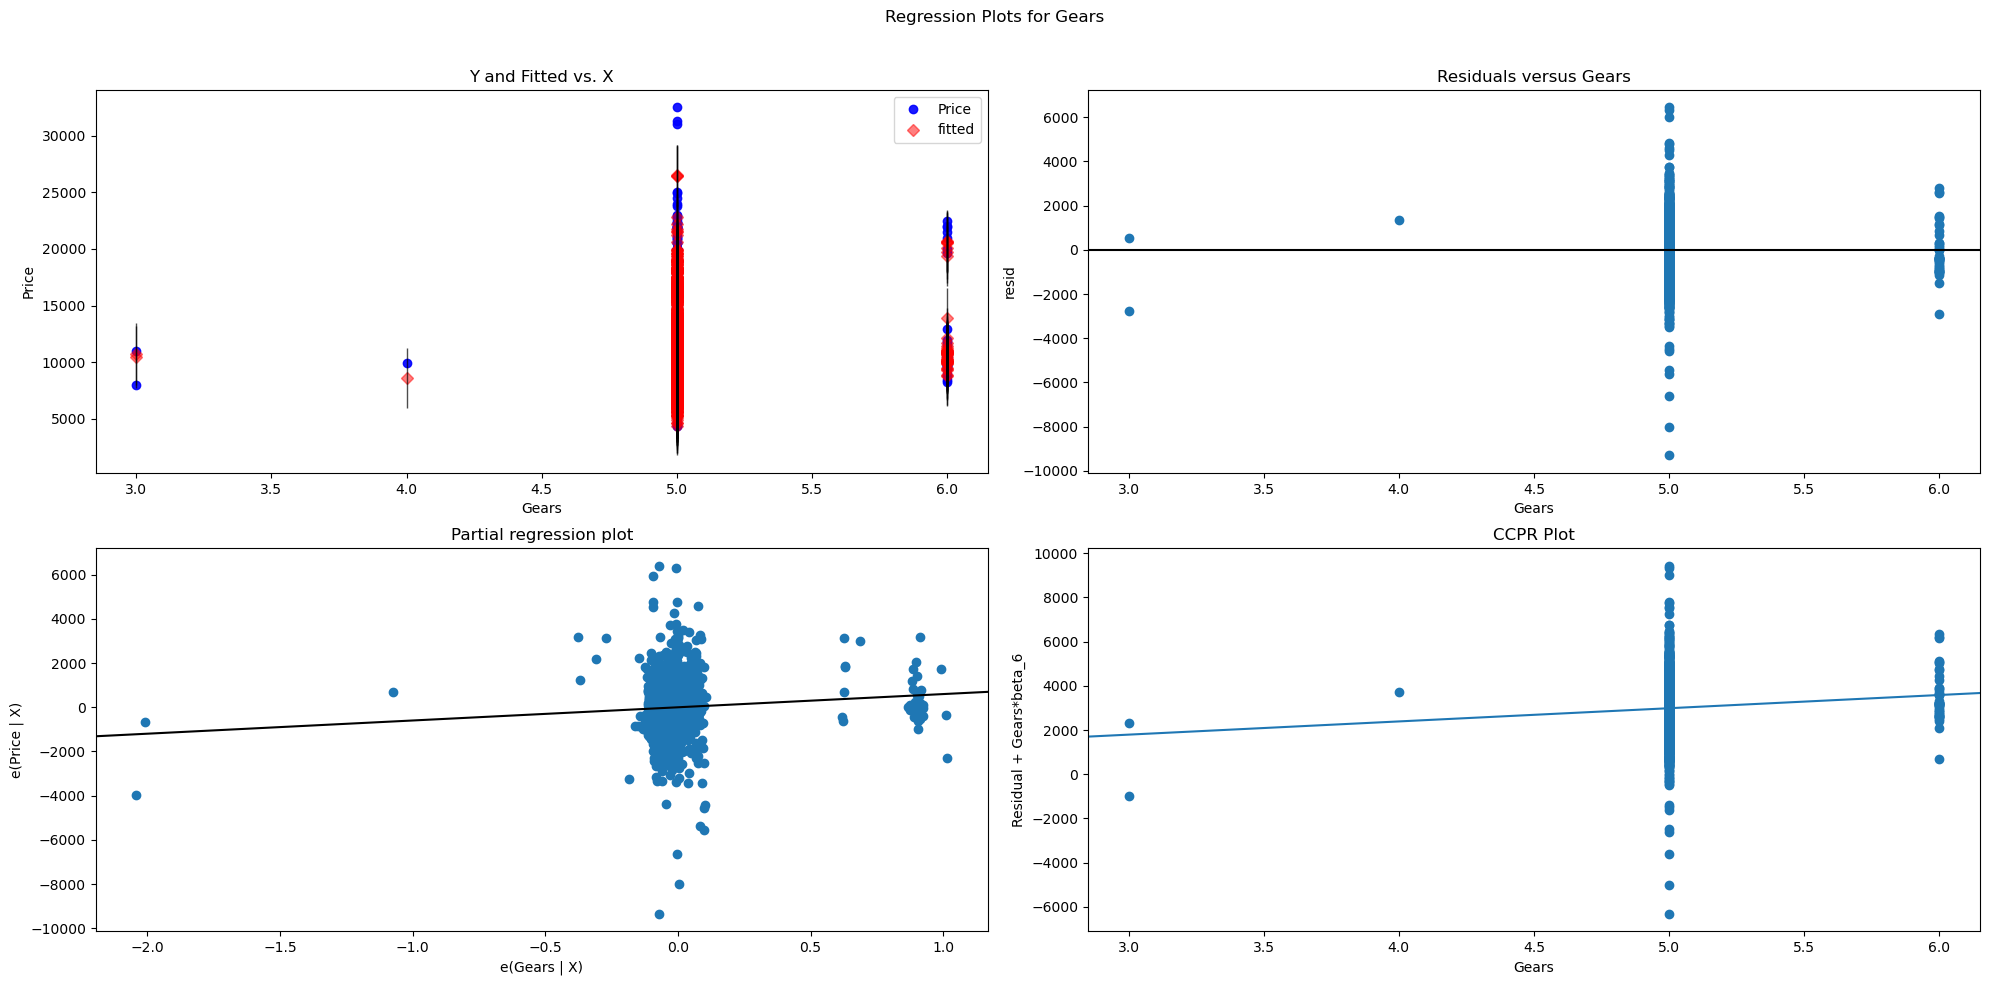

In [38]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

eval_env: 1


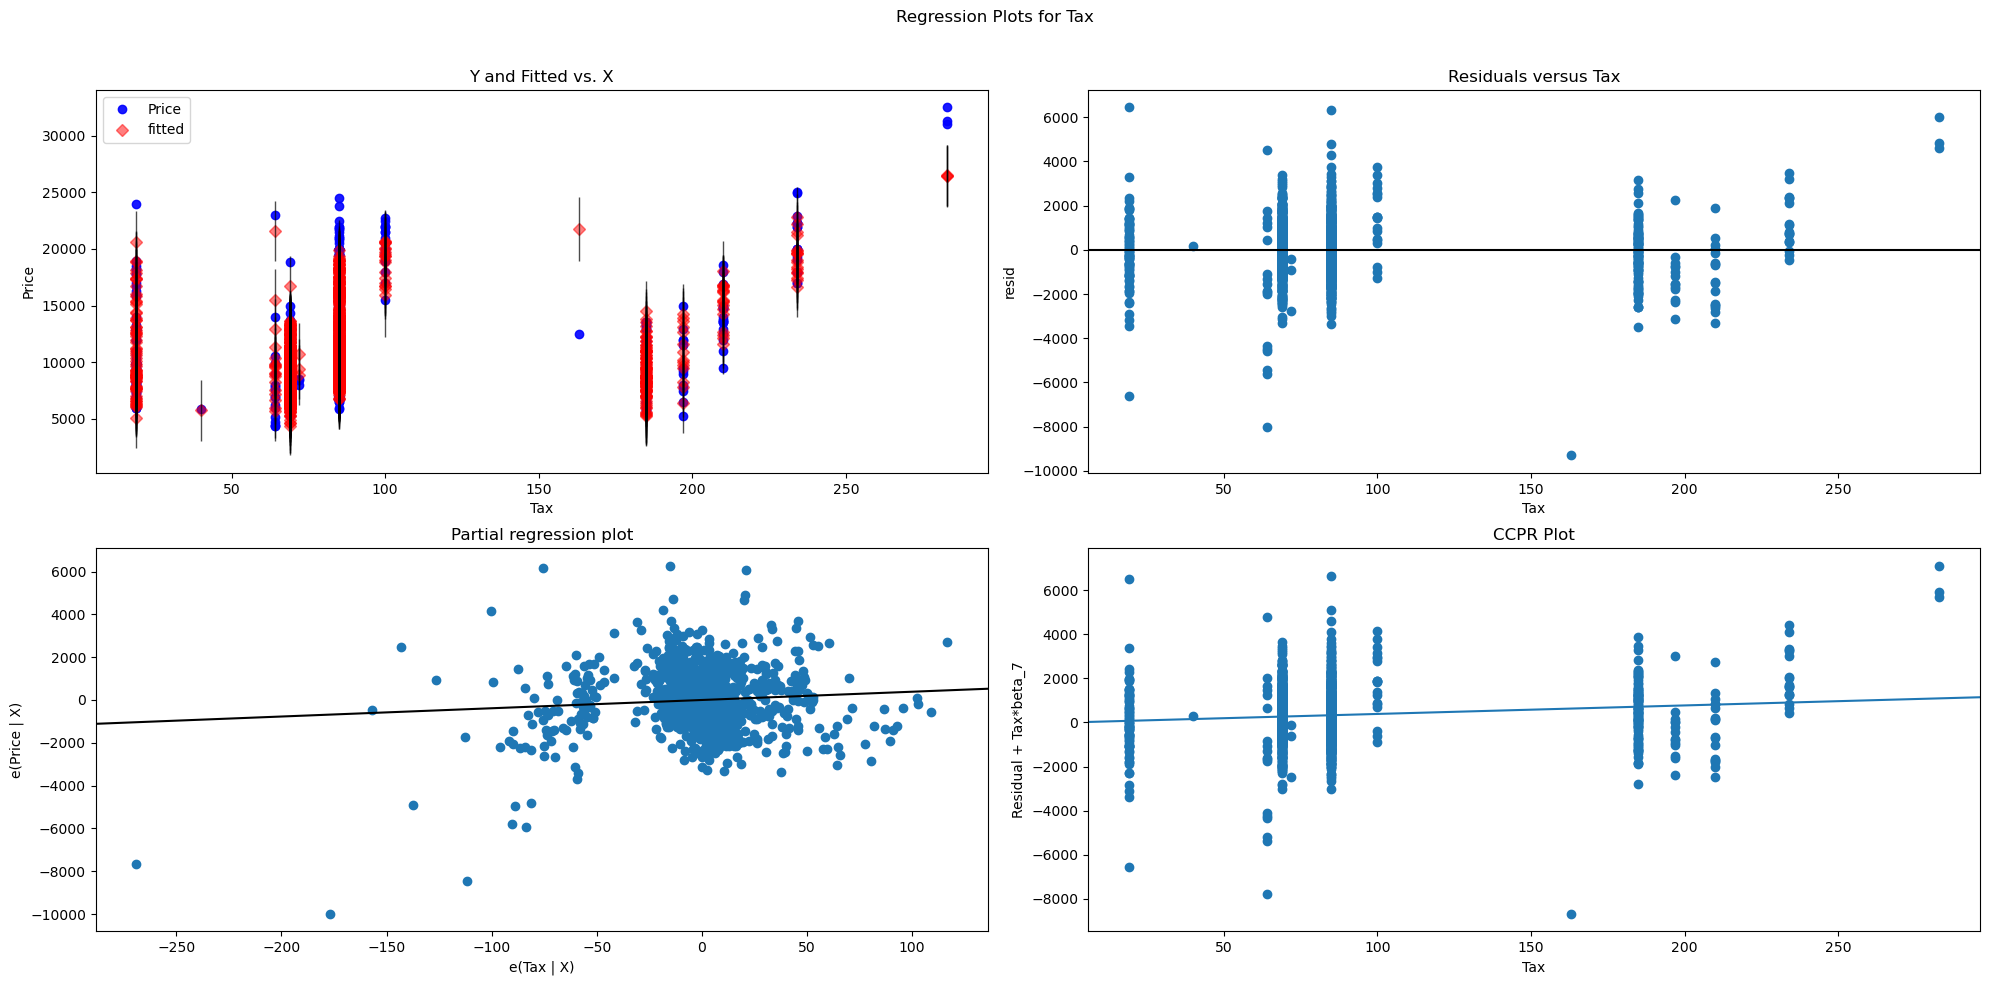

In [39]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Tax", fig=fig)
plt.show()

eval_env: 1


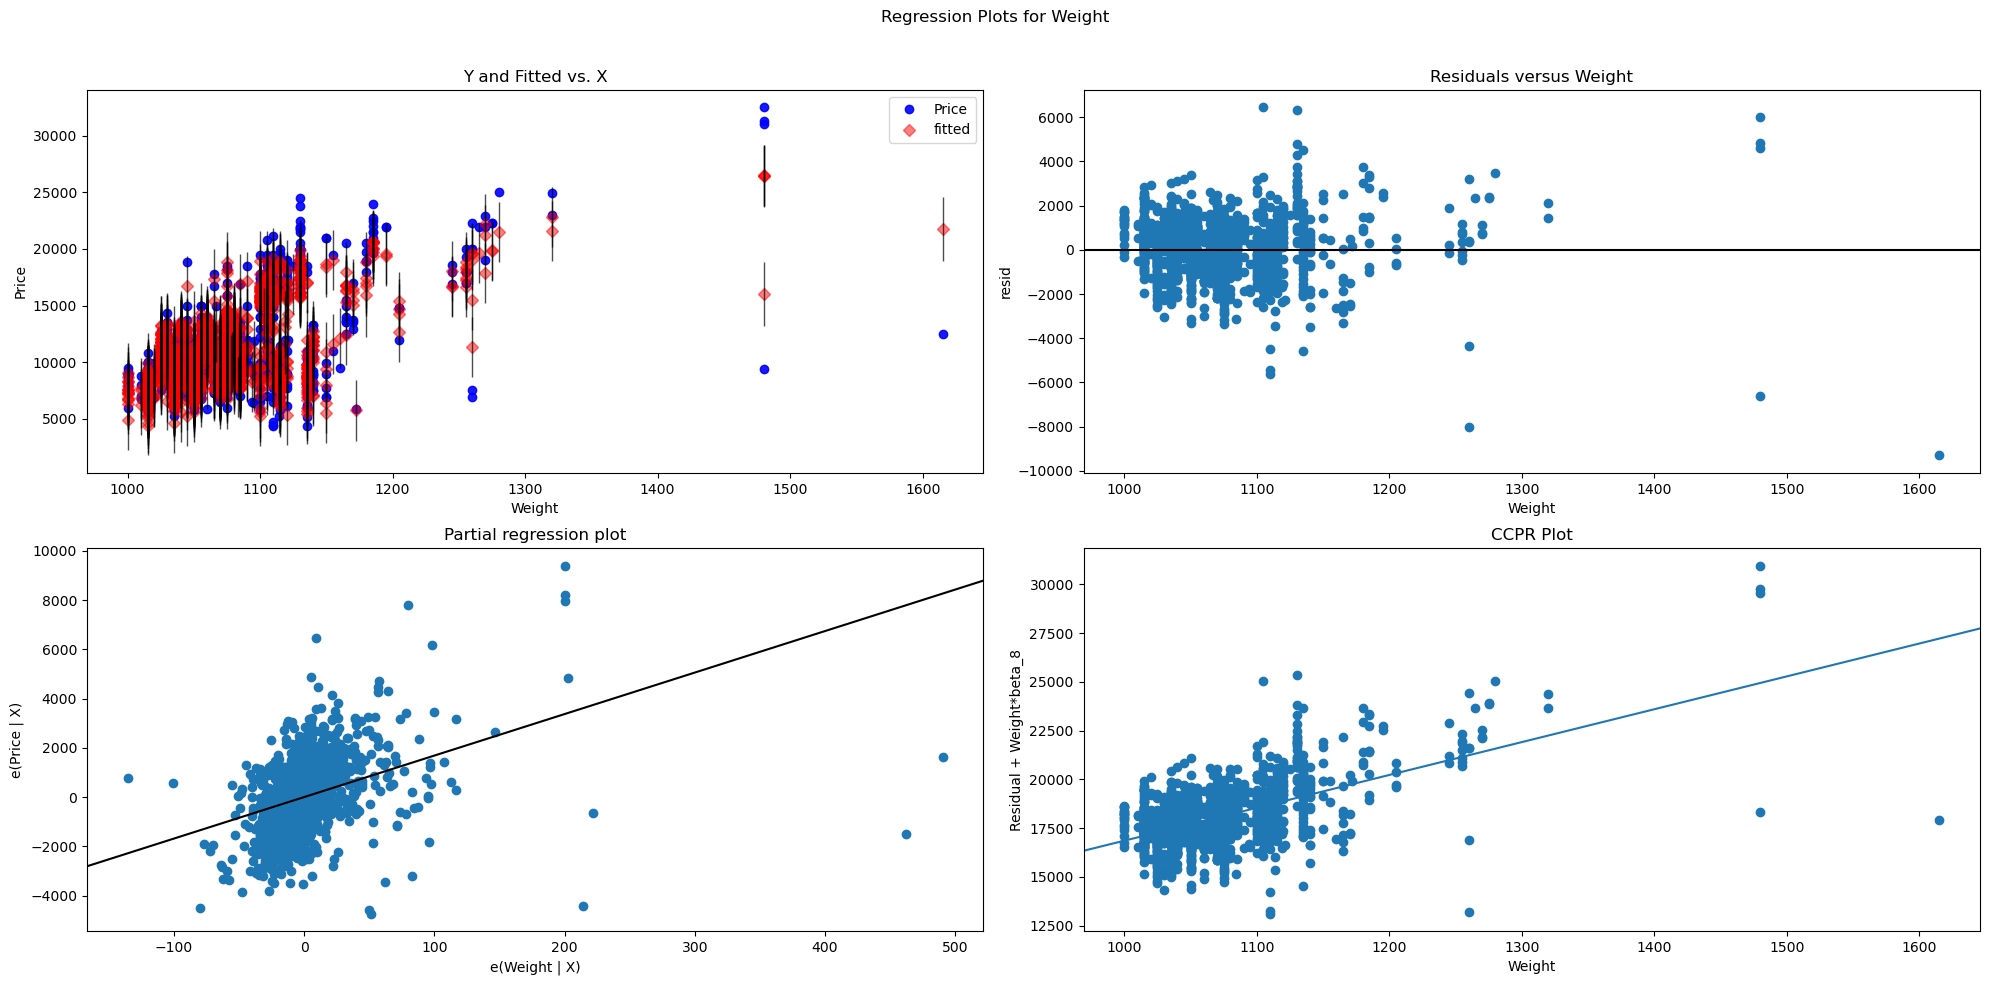

In [40]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [41]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


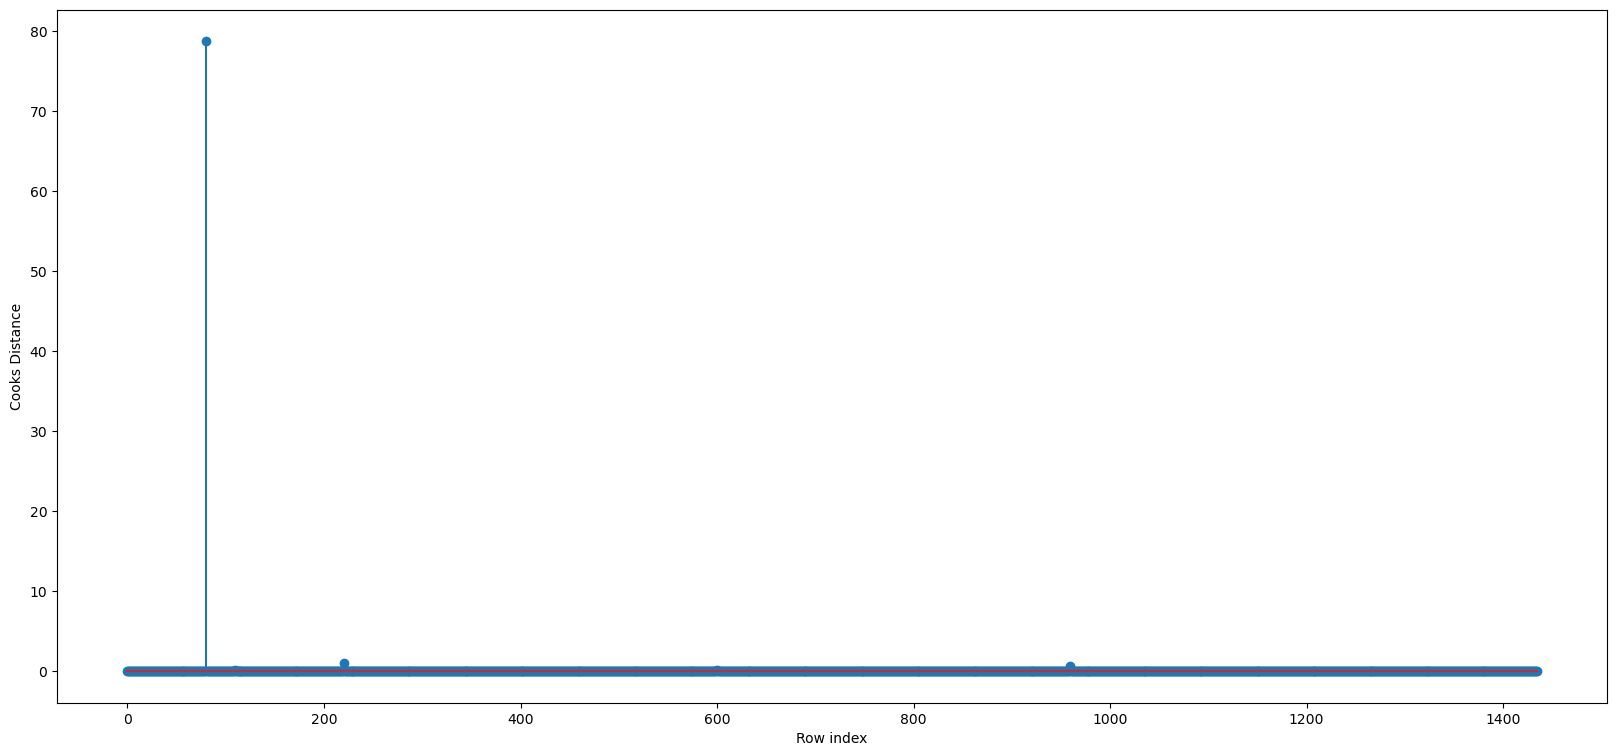

In [42]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 9))
plt.stem(np.arange(len(data4)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
np.argmax(c),np.max(c)

(80, 78.72950582260091)

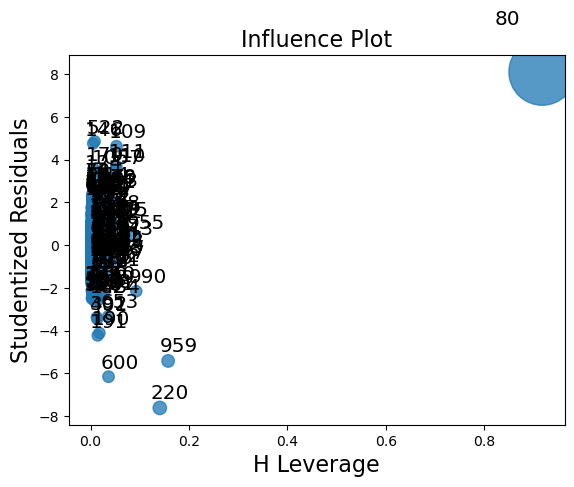

In [44]:
influence_plot(model)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [45]:
k = data4.shape[1]
n = data4.shape[0]
lev= 3*((k + 1)/n)
lev

0.020905923344947737

In [46]:
data4[data4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [47]:
toy=data4.copy()
toy.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [48]:
data4.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [49]:
data5=toy.drop(toy.index[[80]],axis=0).reset_index(drop=True)
data5.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
data5[data5.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
80,17250,29,20000,110,1600,5,5,85,1115


In [51]:
model1=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data5).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:05   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
Tax            8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model_influence1 = model1.get_influence()
(v, _) = model_influence1.cooks_distance
v

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

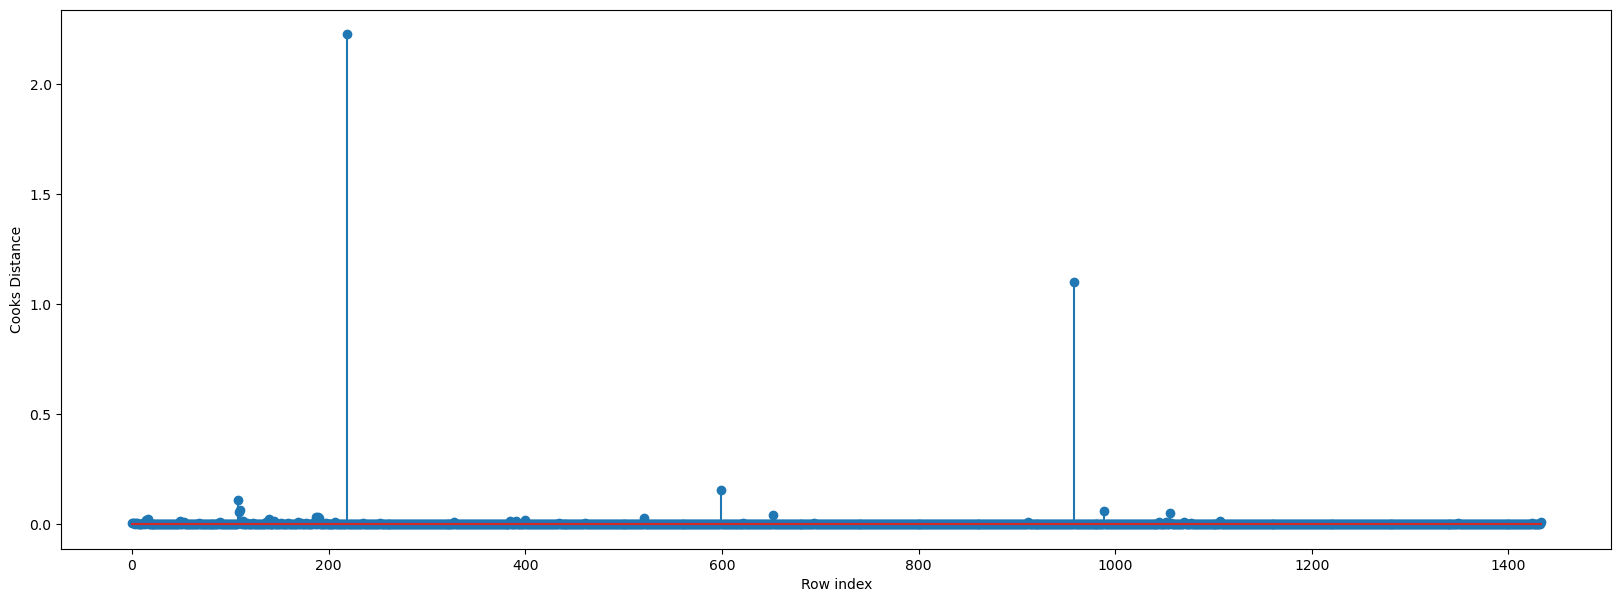

In [53]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(v, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [54]:
np.argmax(v),np.max(v)

(219, 2.2253513655270725)

In [55]:
toy1=data5.copy()
toy1.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [56]:
data5[data5.index.isin([219])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
219,12450,44,74172,110,1600,5,5,163,1615


In [57]:
data6=toy1.drop(toy1.index[[219]],axis=0).reset_index(drop=True)
data6.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [58]:
data6[data6.index.isin([219])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
219,11950,40,73042,110,1598,5,5,85,1075


In [59]:
model2=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data6).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1264.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:05   Log-Likelihood:                -12270.
No. Observations:                1433   AIC:                         2.456e+04
Df Residuals:                    1424   BIC:                         2.461e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.018e+04   1398.103     -7.279      0.000   -1.29e+04   -7433.579
Age         -116.6301      2.509    -46.483      0.000    -121.552    -111.708
KM            -0.0172      0.001    -13.935      0.000      -0.020      -0.015
HP            39.2081      2.818     13.916      0.000      33.681      44.735
CC            -3.1922      0.305    -10.455      0.000      -3.791      -2.593
Doors        -64.7218     38.159     -1.696      0.090    -139.577      10.133
Gears        487.4310    186.626      2.612      0.009     121.340     853.522
Tax            7.8987      1.384      5.706      0.000       5.183      10.614
Weight        24.9584      1.189     20.983      0.000      22.625      27.292
==============================================================================
Omnibus:                      195.629   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.249
Skew:                          -0.308   Prob(JB):                         0.00
Kurtosis:                       8.357   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
model_influence2 = model2.get_influence()
(C, _) = model_influence2.cooks_distance
C

array([6.93624492e-03, 3.71406676e-03, 5.00484600e-03, ...,
       3.96836748e-06, 9.68186346e-04, 1.26195368e-02])

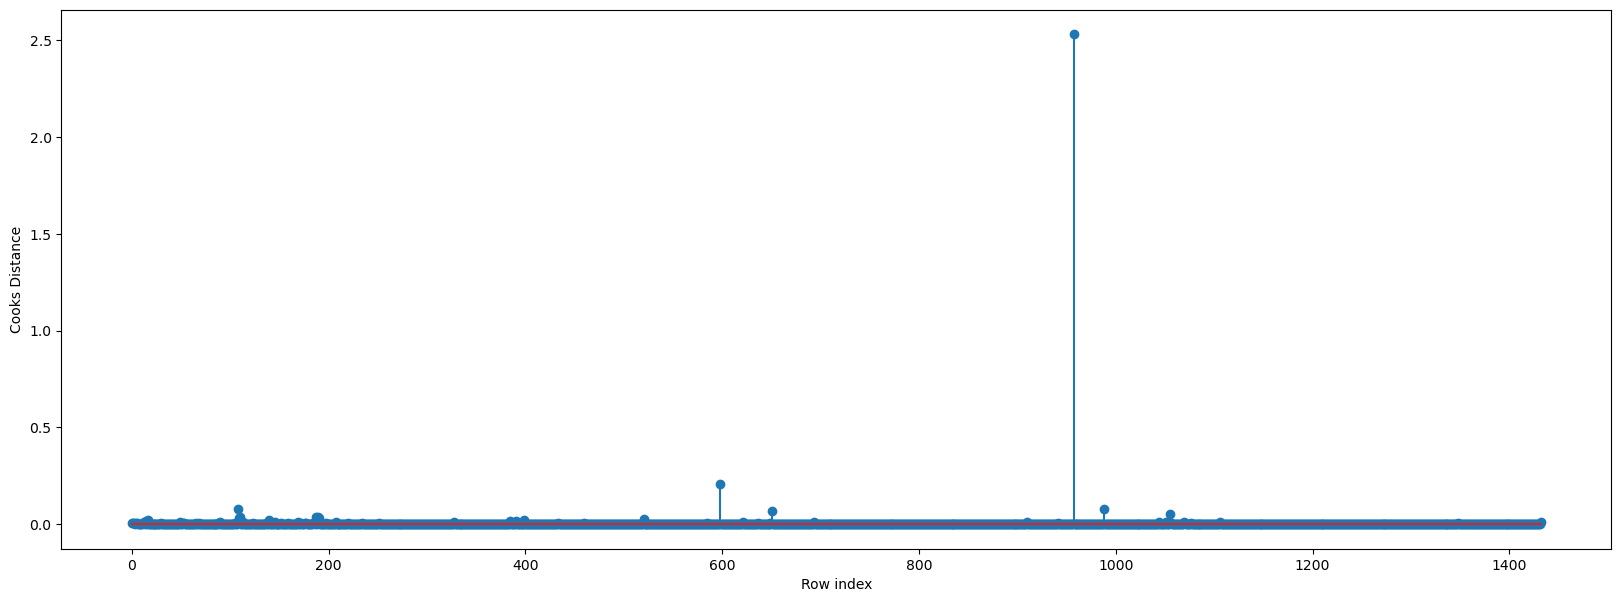

In [61]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(C, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [62]:
np.argmax(C),np.max(C)

(957, 2.5307796232782094)

In [63]:
toy2=data6.copy()
toy2.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [64]:
data6[data6.index.isin([957])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
957,9390,66,50806,86,1300,3,5,19,1480


In [65]:
data7=toy2.drop(toy2.index[[957]],axis=0).reset_index(drop=True)
data7.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [66]:
data7[data7.index.isin([957])]

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
957,8750,59,50469,110,1600,5,5,85,1070


In [67]:
model3=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data7).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1355.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:06   Log-Likelihood:                -12218.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.468e+04   1436.358    -10.222      0.000   -1.75e+04   -1.19e+04
Age         -112.0629      2.481    -45.176      0.000    -116.929    -107.197
KM            -0.0170      0.001    -14.135      0.000      -0.019      -0.015
HP            36.5587      2.747     13.308      0.000      31.170      41.947
CC            -3.7852      0.303    -12.508      0.000      -4.379      -3.192
Doors       -121.9808     37.498     -3.253      0.001    -195.539     -48.423
Gears        466.6014    181.031      2.577      0.010     111.485     821.718
Tax            5.1754      1.373      3.770      0.000       2.482       7.869
Weight        30.5667      1.295     23.595      0.000      28.025      33.108
==============================================================================
Omnibus:                      121.369   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              700.907
Skew:                          -0.078   Prob(JB):                    6.31e-153
Kurtosis:                       6.424   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
model_influence3 = model3.get_influence()
(V, _) = model_influence3.cooks_distance
V

array([6.82389815e-03, 3.57552355e-03, 4.84841789e-03, ...,
       1.03806619e-05, 1.10039755e-03, 1.82165409e-02])

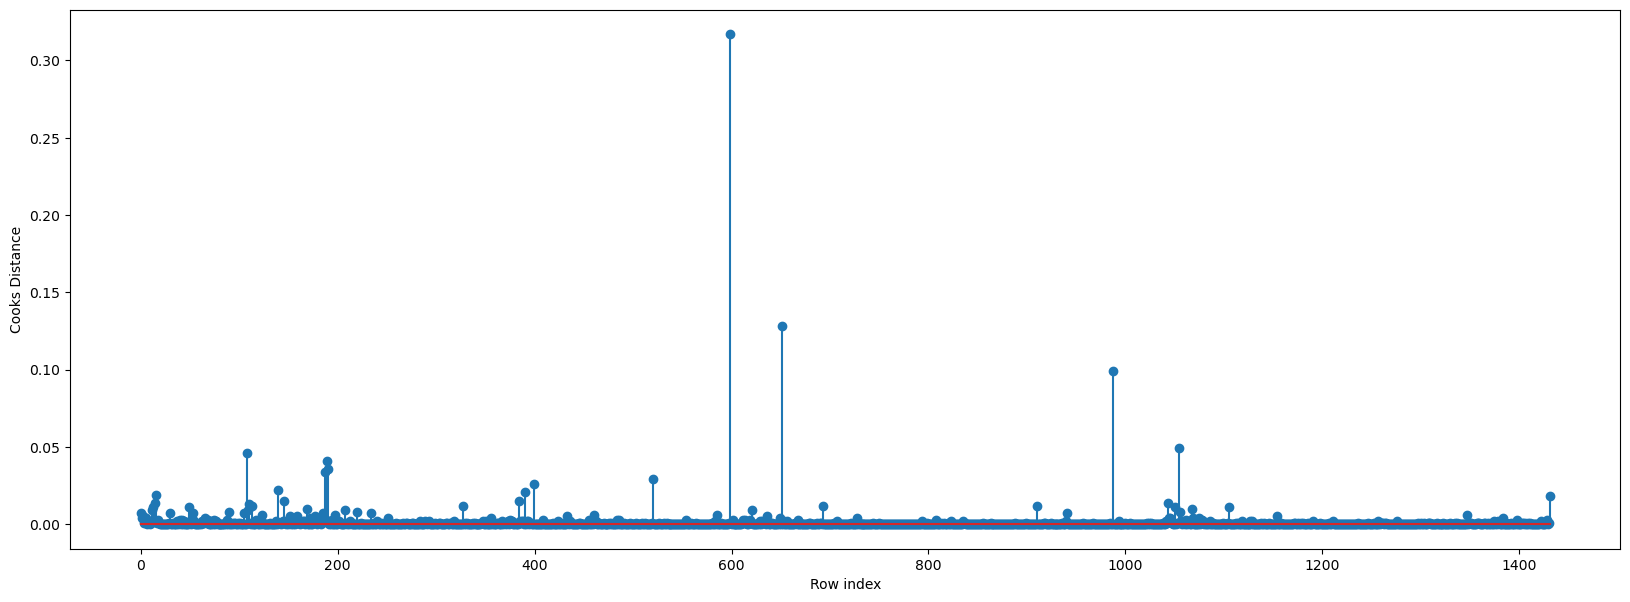

In [69]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(V, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
np.argmax(V),np.max(V)

(598, 0.316890354014546)

In [71]:
toy3=data7.copy()
toy3.head()

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [72]:
data8=toy3.drop(toy3.index[[598]],axis=0).reset_index(drop=True)
data8

,Price,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


In [73]:
model4=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+Tax+Weight',data=data8).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1413.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:09:06   Log-Likelihood:                -12182.
No. Observations:                1431   AIC:                         2.438e+04
Df Residuals:                    1422   BIC:                         2.443e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.613e+04   1423.155    -11.333      0.000   -1.89e+04   -1.33e+04
Age         -110.3700      2.445    -45.135      0.000    -115.167    -105.573
KM            -0.0177      0.001    -14.951      0.000      -0.020      -0.015
HP            34.2632      2.714     12.625      0.000      28.940      39.587
CC            -3.6790      0.297    -12.372      0.000      -4.262      -3.096
Doors       -143.5437     36.919     -3.888      0.000    -215.965     -71.122
Gears        469.5788    177.682      2.643      0.008     121.033     818.125
Tax            3.6472      1.363      2.676      0.008       0.973       6.321
Weight        32.1321      1.289     24.931      0.000      29.604      34.660
==============================================================================
Omnibus:                       75.132   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.049
Skew:                           0.122   Prob(JB):                     6.82e-56
Kurtosis:                       5.050   Cond. No.                     3.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
model_influence4 = model4.get_influence()
(c1, _) = model_influence4.cooks_distance
c1

array([7.18056939e-03, 3.71306271e-03, 5.13993637e-03, ...,
       1.69549130e-05, 1.19873452e-03, 2.20210592e-02])

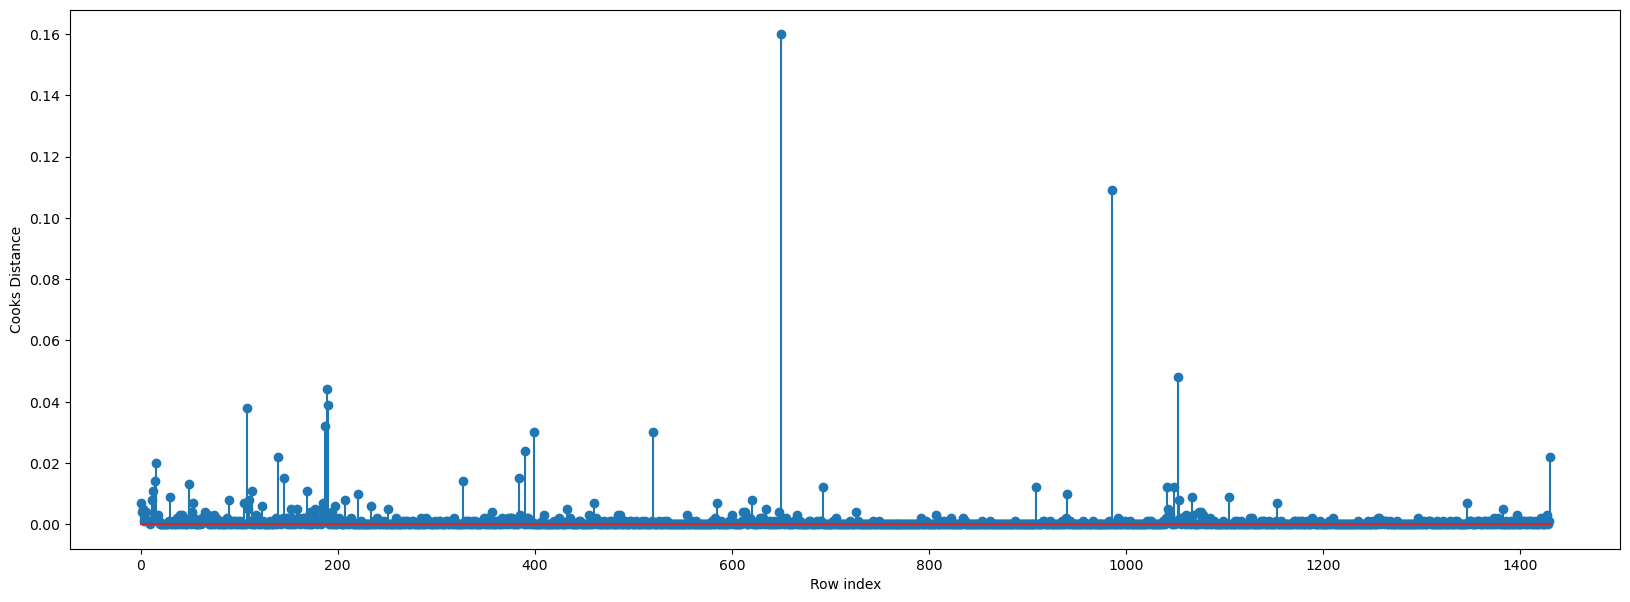

In [75]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.round(c1, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [76]:
np.argmax(c1),np.max(c1)

(650, 0.16028069686052385)

In [77]:
model4.rsquared

0.8882395145171204

In [81]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':38,"KM":45000,"HP":90,"CC":1350,"Doors":4,"Gears":6,"Tax":69,"Weight":1017},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,Tax,Weight
0,38,45000,90,1350,4,6,69,1017


In [82]:
model4.predict(new_data)

0    12172.490334
dtype: float64

In [83]:
final_value=model4.predict(data8)
final_value

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64